#### K-Nnearest Neighbours (KNN) Model
kernel crashed, worked on google colab

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive,files

## Load the dataset

In [ ]:
drive.mount("/content/gdrive")
df = pd.read_csv('/content/gdrive/My Drive/580/Combined_Delayed_2Days.csv')
df.head()

Mounted at /content/gdrive


,Date,Tweets_clean_more,polarity,subjectivity,sentiment,Label_delayed_2Days
0,2013-01-10,to super clear i dont wish could i mandat anyt...,0.216667,0.525000,positive,Decrease
1,2019-01-10,ye get regulatori pushback may avail region go...,0.123333,0.490556,positive,Increase
2,2020-01-10,dome barrel weld made bar pretti good bar need...,0.411111,0.570988,positive,Decrease
3,2012-01-11,the exec conf room tesla use call denali i dec...,0.600000,1.000000,positive,Decrease
4,2016-01-11,sad hear david bowi die he amaz,-0.500000,1.000000,negative,Increase


In [ ]:
df = df[["Date","Tweets_clean_more","Label_delayed_2Days"]]
#df = df.replace({'positive':1,'negative':-1,'neutral':0,'Increase':1,'Decrease':-1,'No Change':0})
df.set_index("Date",inplace= True)
df.head()

,Tweets_clean_more,Label_delayed_2Days
Date,,
2013-01-10,to super clear i dont wish could i mandat anyt...,Decrease
2019-01-10,ye get regulatori pushback may avail region go...,Increase
2020-01-10,dome barrel weld made bar pretti good bar need...,Decrease
2012-01-11,the exec conf room tesla use call denali i dec...,Decrease
2016-01-11,sad hear david bowi die he amaz,Increase


## Train test split, vectorize the text

In [ ]:
x = df['Tweets_clean_more']
y = df["Label_delayed_2Days"]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state=123)
vec = CountVectorizer()
vec.fit(x_train)
vec.fit(x_test)
x_train_features = vec.transform(x_train)
x_test_features = vec.transform(x_test)

### check x_train shape

In [ ]:
x_train_features.shape

(1136, 3361)

## fit the model
used different number of neighbors (from 1-21) and manhattan distance as hyperparameters

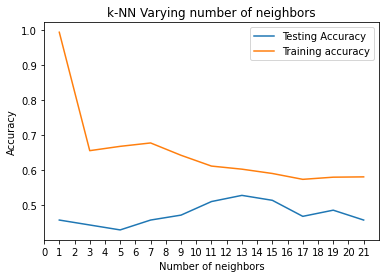

In [ ]:
neighbors =[i for i in range(1,22,2)]
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,n in enumerate(neighbors):
    clf = KNeighborsClassifier(n_neighbors=n,p=1) # manhattan distance
    clf.fit(x_train_features,y_train)

    train_accuracy[i] = clf.score(x_train_features,y_train)
    test_accuracy[i] = clf.score(x_test_features,y_test)


plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.xticks(np.arange(0,22,step=1))
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

## best model with manhattan distance
n = 13, p = 1

Accuracy = 0.528

Model report:
classification report:
               precision    recall  f1-score   support

    Decrease       0.56      0.39      0.46       140
    Increase       0.51      0.69      0.59       139
   No Change       0.00      0.00      0.00         5

    accuracy                           0.53       284
   macro avg       0.36      0.36      0.35       284
weighted avg       0.53      0.53      0.51       284

Accuracy score:  0.528169014084507
F1 Score: 0.528169014084507
ROC AUC Score: 0.6461267605633803


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


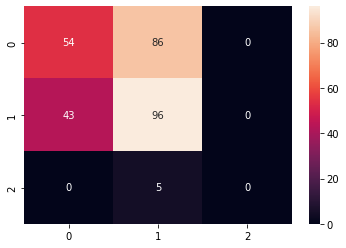

In [ ]:
clf = KNeighborsClassifier(n_neighbors=13,p=1) # manhattan distance
clf.fit(x_train_features,y_train)
ypred_test = clf.predict(x_test_features)
cm = confusion_matrix(y_test,ypred_test)
acc = accuracy_score(y_test,ypred_test)
print("Model report:")
print("classification report:\n",classification_report(y_test,ypred_test))
print("Accuracy score: ",acc)
print("F1 Score:",f1_score(y_test,ypred_test,average="micro"))
lb = LabelBinarizer()
lb.fit(y_test)
y_test_lb = lb.transform(y_test)
ypred_test_lb = lb.transform(ypred_test)
print("ROC AUC Score:",roc_auc_score(y_test_lb, ypred_test_lb, average='micro'))
sns.heatmap(cm,annot=True)


## model with euclidean distance

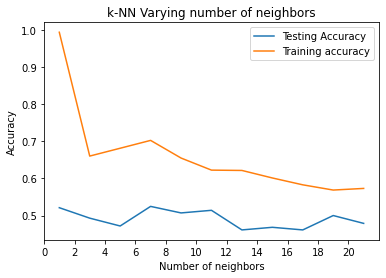

In [ ]:
neighbors =[i for i in range(1,22,2)]
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,n in enumerate(neighbors):
    clf = KNeighborsClassifier(n_neighbors=n,p=2) #euclidean distance
    clf.fit(x_train_features,y_train)

    train_accuracy[i] = clf.score(x_train_features,y_train)
    test_accuracy[i] = clf.score(x_test_features,y_test)

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.xticks(np.arange(0,22,step=2))
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


## best model with euclidean sidtance
n = 7, p=2

Model report:
classification report:
               precision    recall  f1-score   support

    Decrease       0.53      0.41      0.46       140
    Increase       0.52      0.66      0.58       139
   No Change       0.00      0.00      0.00         5

    accuracy                           0.52       284
   macro avg       0.35      0.36      0.35       284
weighted avg       0.52      0.52      0.51       284

Accuracy score:  0.5246478873239436
F1 Score: 0.5246478873239436
ROC AUC Score: 0.6434859154929576


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


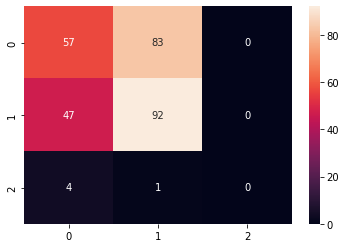

In [ ]:
clf = KNeighborsClassifier(n_neighbors=7,p=2) # euclidean distance
clf.fit(x_train_features,y_train)
ypred_test = clf.predict(x_test_features)
cm = confusion_matrix(y_test,ypred_test)
acc = accuracy_score(y_test,ypred_test)
print("Model report:")
print('classification report:\n',classification_report(y_test,ypred_test))
print("Accuracy score: ",acc)
print("F1 Score:",f1_score(y_test,ypred_test,average="micro"))
lb = LabelBinarizer()
lb.fit(y_test)
y_test_lb = lb.transform(y_test)
ypred_test_lb = lb.transform(ypred_test)
print("ROC AUC Score:",roc_auc_score(y_test_lb, ypred_test_lb, average='micro'))
sns.heatmap(cm,annot=True)
